## Yet another Handwritten Digits Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

### Plotting images 

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target_names', 'target', 'DESCR', 'images'])

In [3]:
labels = pd.Series(digits['target'])
data = pd.DataFrame(digits['data'])

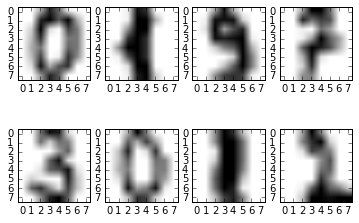

In [4]:
f, ax = plt.subplots(2, 4)
ax[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

ax[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## KNN Model

In [5]:
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions =  model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label']
                  )/len(train_test_df)
    return accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [6]:
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

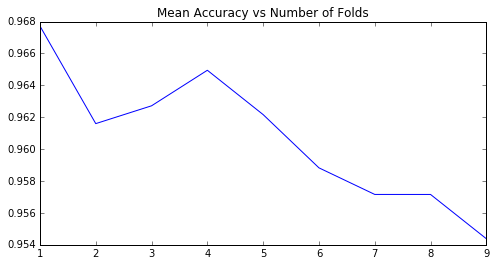

In [7]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs Number of Folds')
plt.plot(k_values, k_overall_accuracies)

## MLP Classifier 1 Hidden Layer

In [8]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

In [9]:
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label']
                          )/len(train_test_df)
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



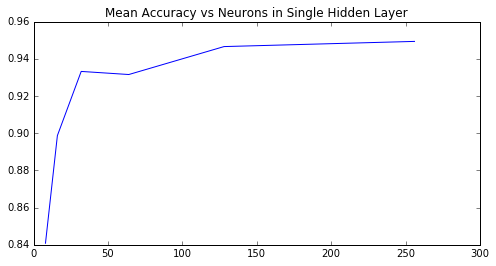

In [10]:
nn_one_neurons = [(8,),
                  (16,),
                  (32,),
                  (64,),
                  (128,),
                  (256,)]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs Neurons in Single Hidden Layer')

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

By adding a hidden layer, and by iterating through the sizes, we see that the accuracy has improved from 84% up to 95%

## NN with 2 Hidden Layers

In [ ]:
nn_two_neurons = [(64,64),
                  (128,128),
                  (256,256)]
nn_two_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs Neurons in Single Hidden Layer')

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.

